<h1>Feature Engineering

1. Product_id drop column
2. Stall_no as it is
3. instock_date split
4. Market_Category as it is
5. Customer_name drop column
6. Loyalty_customer split in binary
7. Product_Category label encode
8. rest as it is 

In [1]:
#import library 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data from csv

df = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
#column names of dataset

df.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [4]:
#Take only positive and not null values from Selling_Price in dataframe

# df=df[df['Selling_Price']>0] #-------------------------------------------------

<b>instock_date partitioned as month,weekday, year etc for better understanding of seasionality if any

In [5]:
#change date field in date,time, month etc

df['instock_date'] = pd.to_datetime(df['instock_date'])
df['month'] = df['instock_date'].apply(lambda date:date.month)
df['year'] = df['instock_date'].apply(lambda date:date.year)
df['weekday'] = df['instock_date'].apply(lambda date:date.weekday())
df['No_of_Week'] = df['instock_date'].apply(lambda date:date.week)

In [6]:
#test data

df_test['instock_date'] = pd.to_datetime(df_test['instock_date'])
df_test['month'] = df_test['instock_date'].apply(lambda date:date.month)
df_test['year'] = df_test['instock_date'].apply(lambda date:date.year)
df_test['weekday'] = df_test['instock_date'].apply(lambda date:date.weekday())
df_test['No_of_Week'] = df_test['instock_date'].apply(lambda date:date.week)

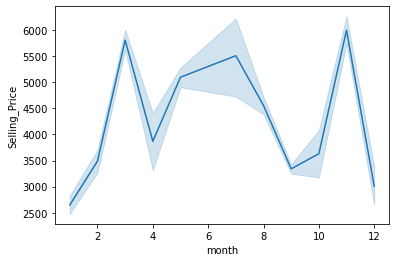

In [7]:
#monthwise change in price

sns.lineplot(x='month',y='Selling_Price',data=df)

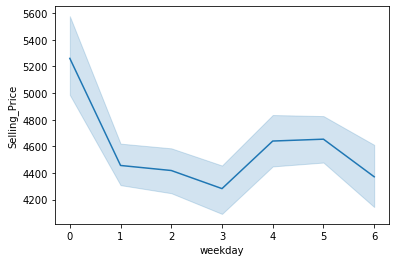

In [8]:
#weekday wise change in price

sns.lineplot(x='weekday',y='Selling_Price',data=df)

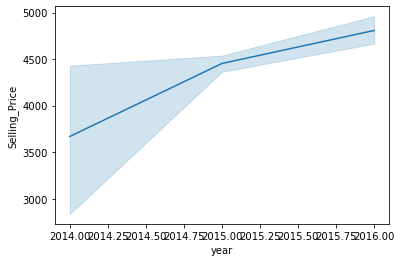

In [9]:
#year wise change in price 

sns.lineplot(x='year',y='Selling_Price',data=df)

In [10]:
#'Loyalty_customer' was in yes and no, change it to 1/0

loyalty = {'Yes':1,'No ':0}
df['Loyalty_customer']=df['Loyalty_customer'].map(loyalty)
df_test['Loyalty_customer']=df_test['Loyalty_customer'].map(loyalty)

---
<b>Label encoding Product_Category as per their mean sell price

In [11]:
#find the unique fields in product category 

df['Product_Category'].unique()

array(['Fashion', 'Child_care', 'Educational', 'Repair', 'Technology',
       'Cosmetics', 'Hospitality', 'Organic', 'Pet_care', 'Home_decor'],
      dtype=object)

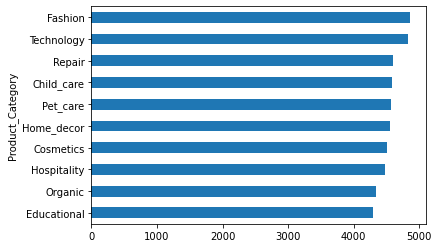

In [12]:
#checking categorywise mean sell price 

df.groupby('Product_Category').agg('Selling_Price').mean().sort_values().plot(kind='barh')

In [13]:
#label encoding product_category field based on their sorting into mean sell price

product={'Educational':1,'Organic':2,'Hospitality':3,'Cosmetics':4,
        'Home_decor':5,'Pet_care':6,'Child_care':7,'Repair':8,'Technology':9,'Fashion':10}

df['Product_Category']=df['Product_Category'].map(product)
df_test['Product_Category']=df_test['Product_Category'].map(product)

In [14]:
df.head() #top of the dataset

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,month,year,weekday,No_of_Week
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,Lillyann,1,10,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,8,2015,5,34
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,Klynn,1,10,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,3,2016,6,12
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,Ridge,1,7,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,8,2015,1,34
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,Abran,1,1,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,3,2016,0,13
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,Dustyn,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,3,2016,1,13


In [15]:
df_test.head() #top of of the testset

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,month,year,weekday,No_of_Week
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08,205,Ivanka,0,10,0,90,0,380.0,16.0,2576.0,3340,1,2016,2,2
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05,3,Isaak,1,10,0,87,0,393.0,16.0,1202.0,1955,8,2015,6,34
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39,183,Analiese,0,9,2,55,0,493.0,9.0,7175.0,15715,11,2015,5,46
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19,358,Rusty,1,7,3,86,0,303.0,16.0,5404.0,13078,11,2015,5,47
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46,167,Eloise,0,9,0,27,0,567.0,16.0,4069.0,6244,5,2015,2,19


**Delete two extreme low Selling_Price rows, then taking absolute value of Selling_Price**

In [16]:
df=df.drop([4398,2163],axis=0)

In [17]:
df['Selling_Price']=abs(df['Selling_Price'])

In [ ]:
# df=df.drop(['Product_id','instock_date','Customer_name'],axis=1)
# df_test=df_test.drop(['instock_date','Customer_name'],axis=1)

In [ ]:
# df.to_csv('Train_cleaned.csv',index=False)
# df_test.to_csv('Test_cleaned.csv',index=False)